<a href="https://colab.research.google.com/github/Scott-Huston/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Scott_Huston_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

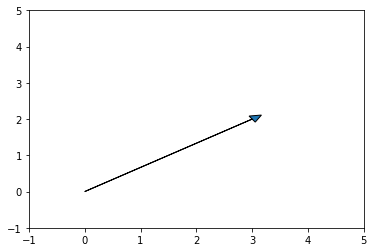

In [1]:
import matplotlib.pyplot as plt
plt.arrow(0,0, 3, 2,head_width=.2, head_length=0.2)

plt.xlim(-1,5)          
plt.ylim(-1,5)
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [2]:
import numpy as np
b = np.array([17,-4,-2,1])
print('Norm = ',np.linalg.norm(b))

# The norm of a vector represents it's length/magnitude. In this case, the norm is 17.6.

Norm =  17.60681686165901


## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [3]:
c = np.array([3,7,-2,12])
d = np.array([9,-7,4,6])

print(np.dot(c,d))

# No, these vectors are not orthagonal because their dot product is not zero.

42


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [4]:
e = np.array([[7,4,2],
              [1,3,-1],
              [2,6,-4]])

print('Inverse: \n',np.linalg.inv(e))
print('Transpose: \n',e.T)

Inverse: 
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
Transpose: 
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [5]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [6]:
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [7]:
answers = pd.DataFrame({'Statistic': ['Mean', 'Std', 'Variance'], 
                   'customers': [df.customers.mean(),df.customers.std(),df.customers.var()],
                  'snow': [df.snow.mean(),df.snow.std(),df.snow.var()]})
answers.set_index('Statistic', inplace = True)

print(answers)

              customers      snow
Statistic                        
Mean        1135.714286  2.714286
Std          314.264069  2.927700
Variance   98761.904762  8.571429


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

No, they are in different units

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [8]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


##2.4 What are Eigenvalues and Eigenvectors?

Eigenvectors are vectors that have the same span after a linear transformation. The Eigenvalue is the scalar value by which the Eigenvector is scaled during the transformation.

...

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [9]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [10]:
# Isolating X variables from target variable (Country)
X = df.drop(['Country'], axis='columns')
X.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [11]:
# Normalizing data in Z dataframe
Z=(X-X.mean())/X.std()
Z.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,0.570083,-0.015152,-0.224774,0.558227,-0.547700,0.113060,-0.389777,0.747650,0.327129,-0.291214,0.697564,0.638613,-0.557999,-0.044962,-0.376921,0.090931,-0.119774
1,0.464021,-1.106061,1.038240,0.998043,1.330128,1.340571,0.377324,0.947023,1.213892,0.072804,1.014638,0.804795,1.454458,1.393816,-1.216104,0.729040,0.838419
2,0.464021,-0.196970,0.470954,-0.287572,-0.950091,-0.468392,-1.156878,-0.614734,-0.429864,1.310463,-0.760979,-0.049855,-0.740950,-0.404656,1.031200,0.620562,0.646780
3,-1.498124,1.318182,-1.284421,-1.268698,0.167663,-0.985239,1.169331,-1.079939,-1.111157,-1.092053,-0.951223,-1.393554,-0.155508,-0.944198,0.561826,-1.440533,-1.365425


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [12]:
def get_pca_df(normalized_X_df):
  from sklearn.decomposition import PCA
  pca = PCA(4)
  pca.fit(normalized_X_df)
  pca_df = pca.transform(normalized_X_df)
  pca_df = pd.DataFrame(data = pca_df)
  return pca_df, pca

pca_df, pca = get_pca_df(X)
pca_df.head()


,0,1,2,3
0,-144.993152,-2.532999,105.768945,-4.937711e-14
1,-240.529148,-224.646925,-56.475555,5.680175e-13
2,-91.869339,286.081786,-44.415495,-7.405690e-13
3,477.391639,-58.901862,-4.877895,2.308104e-13


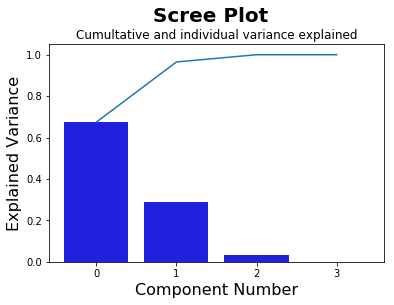

In [13]:
# Creating scree plot
import seaborn as sns
pca_variances_explained = pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':range(0,pca_df.shape[1])})
sns.barplot(x='PC',y="var", 
           data=pca_variances_explained, color="blue")

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 20,
        }

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Component Number', fontsize = 16)
plt.suptitle('Scree Plot', fontsize = 20, fontweight = 'bold', y = 1.01)
plt.title('Cumultative and individual variance explained', y=1)
plt.ylabel('Explained Variance', fontsize = 16);
plt.show()

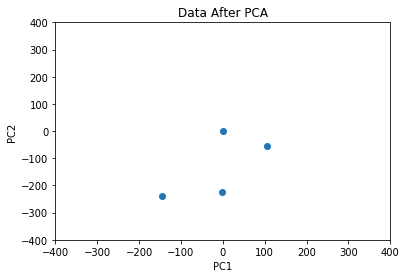

In [14]:
pca_df = pca_df.T

plt.scatter(pca_df[0], pca_df[1])
plt.title("Data After PCA")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-400,400)
plt.ylim(-400,400)
plt.show()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't clustering.

Prioritize calculating the clusters over graphing them, but graph them as well if you have time.

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [15]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [16]:
points.describe()

,x,y
count,200.000000,200.000000
mean,-2.323298,-3.422869
std,4.556513,5.580888
min,-10.118473,-11.095795
25%,-4.619520,-8.246848
50%,-3.373794,-5.307697
75%,-0.427175,3.360028
max,7.807885,5.883054


In [17]:
# Normalizing data
normalized_points = (points-points.mean())/points.std()
normalized_points.describe()

,x,y
count,2.000000e+02,2.000000e+02
mean,3.588796e-16,2.275957e-16
std,1.000000e+00,1.000000e+00
min,-1.710776e+00,-1.374858e+00
25%,-5.039427e-01,-8.643748e-01
50%,-2.305482e-01,-3.377290e-01
75%,4.161347e-01,1.215380e+00
max,2.223451e+00,1.667463e+00


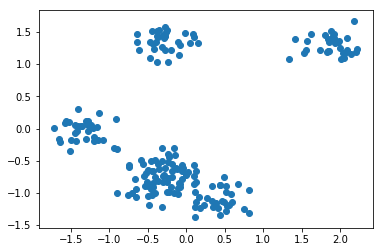

In [18]:
# Visualizing data to help determine how many clusters I should have
plt.scatter(normalized_points['x'], normalized_points['y']);

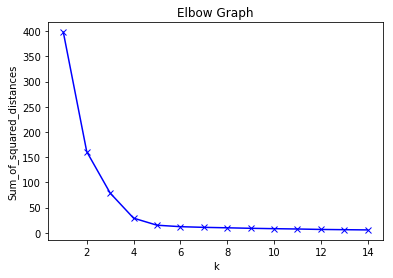

In [19]:
# Creating elbow plot to help determine how many clusters I should have

from sklearn.cluster import KMeans 
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(normalized_points)
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Graph')
plt.show()


From both the visualization and the elbow method, 4 clusters looks like the best choice.

In [20]:
# Performing K-means clustering
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit(normalized_points).labels_


# Adding the k-means labels into my dataframes
label_series = pd.Series(labels)

normalized_points['labels'] = label_series.values
points['labels'] = label_series.values
print(normalized_points.head())
points.head()

          x         y  labels
0 -1.212222  0.000285       3
1 -0.270168 -0.620306       1
2  0.467567 -1.119564       1
3 -0.895017 -0.322727       3
4  0.333429 -1.125553       1


,x,y,labels
0,-7.846803,-3.421277,3
1,-3.554323,-6.884729,1
2,-0.192822,-9.671030,1
3,-6.401456,-5.223972,3
4,-0.804026,-9.704457,1


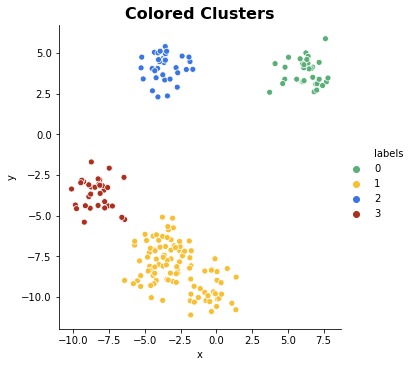

In [21]:
# plotting the original data with different colors for different clusters

sns.relplot(x = 'x', y = 'y', hue = 'labels', data = points, palette = ['#5AAE77','#F9BF32','#3A75E3','#AB3020'])
plt.title('Colored Clusters', fontsize = 16, fontweight = 'bold')
plt.show()

**What would have happened if I hadn't normalized the data before clustering:**

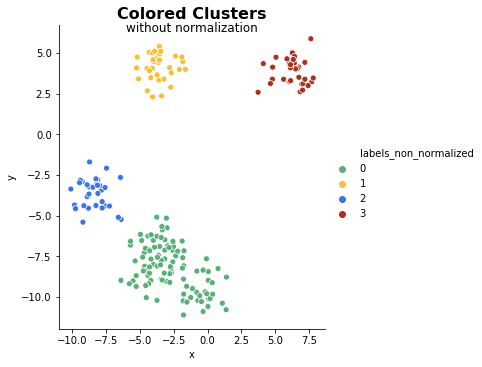

In [22]:
# Performing K-means clustering on original data
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit(points).labels_

# Adding the k-means labels into my dataframe
label_series = pd.Series(labels)
points['labels_non_normalized'] = label_series.values

# Plotting result
sns.relplot(x = 'x', y = 'y', hue = 'labels_non_normalized', data = points, palette = ['#5AAE77','#F9BF32','#3A75E3','#AB3020'])
plt.title('Colored Clusters', fontsize = 16, fontweight = 'bold')
plt.suptitle('without normalization', y=.97, x = .435)
plt.show()


Looks like there's no difference in this case

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

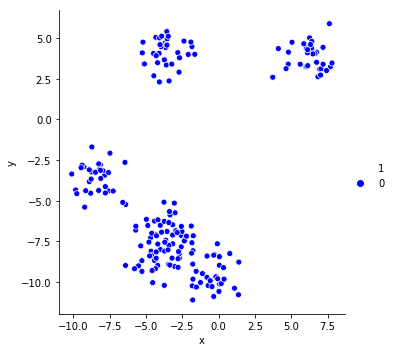

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

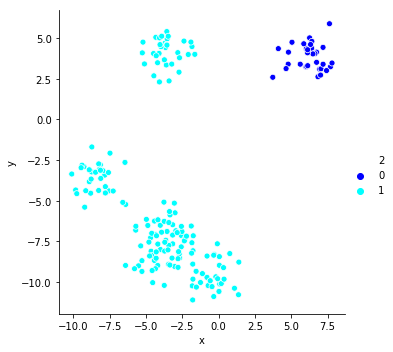

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

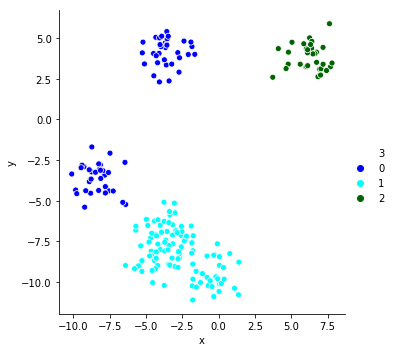

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

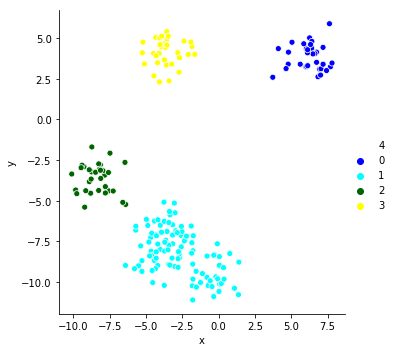

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

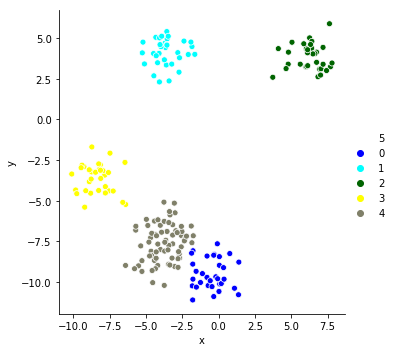

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

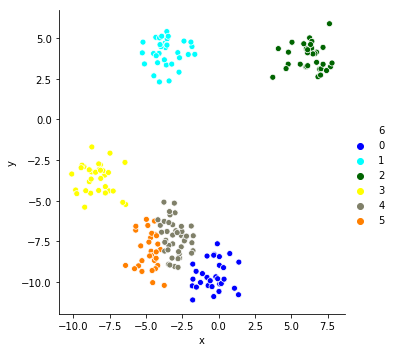

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

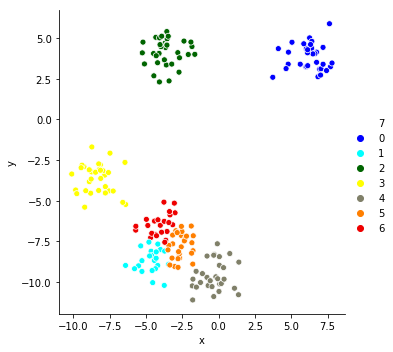

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

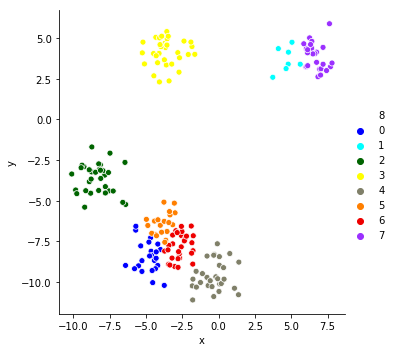

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

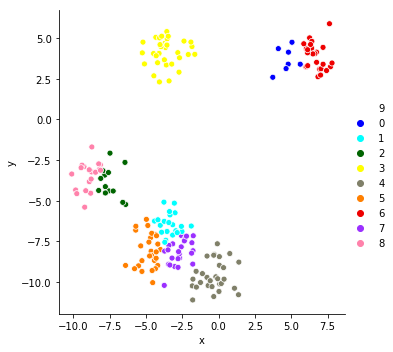

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

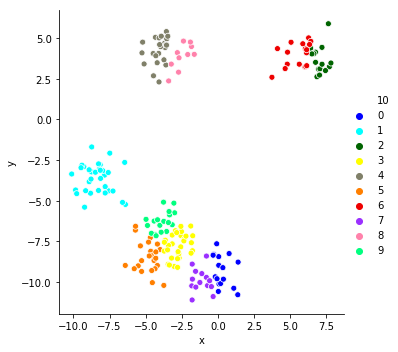

<IPython.core.display.Javascript object>

In [23]:
# Visualizing different numbers of clusters
numbers = range(1,11)

colors = ['#0000FF','#00FFFF','#006400','#FFFF00','#808069','#FF7F00','#EE0000','#9B30FF','#FF82AB','#00FF7F','#030303']

from google.colab import widgets
tb = widgets.TabBar([str(number) for number in numbers])

for tab, number in zip(tb, numbers):
  
  # Performing K-means clustering on original data
  kmeans = KMeans(n_clusters=number)
  labels = kmeans.fit(normalized_points).labels_

  # Adding the k-means labels into my dataframe
  label_series = pd.Series(labels)
  points[number] = label_series.values

  # Plotting result
  sns.relplot(x = 'x', y = 'y', hue = number, data = points, palette = colors[0:number])
  plt.show()